# Important Note for Feature Engineering

Prior to feature engineering phase, the dataset requires train-validation-test split.

All feature engineering preprocessing models/objects needs to be fitted on the training set only to avoid data leakage.

Feature engineering steps need to be done seperately for training set, validation set and test set.

Any feature engineering steps done on target variables require inverse transformation during model evaluation for consistent comparison.

The general steps involved in feature engineering are as follows (which will be covered across 6 sections):
1. Handling Missing Values
2. Handling Imbalanced Dataset
3. Handling Outliers
4. Categorical Data Encoding
5. Feature Transformation
6. Feature Scaling

# Handling Missing Values

The first step involved in feature engineering is handling missing values in a given dataset.

This notebook will involve using various tools from feature-engine and scikit-learn.impute library.

For more details about the tools used in this notebook, refer to the following resources:

Feature-engine library: https://feature-engine.readthedocs.io/en/1.2.x/api_doc/imputation/index.html

Iterative Imputer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

KNN Imputer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

Missing Forest Imputer: https://pypi.org/project/missingpy/

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import feature_engine.imputation as fei
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import missingno as msno
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
%matplotlib inline
pd.set_option('display.max_rows',100)

In [2]:
data = pd.read_csv('boston_housing.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [5]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Data Missingness Types

There are three types of data missingness with its conditions:

<b>Data Missing Completely At Random (MCAR)</b>
1. Missing values randomly scattered
2. Much fewer null values than other types of missingness
3. Very weak correlation of missingness with all other features

<b>Data Missing At Random (MAR)</b>
1. Missing values randomly scattered at first, but not randomly scattered after groupings of other features.
2. Moderate number of null values
3. Very weak to moderate correlation of missingness between one feature and given dependent variable
4. Strong to very strong correlation of missingness between one feature and another feature

<b>Data Missing Not At Random (MNAR)</b>
1. Missing values randomly scattered at first, but still randomly scattered after groupings of dependent variable.
2. Larger number of null values than MCAR data
3. Very weak correlation of missingness with all other features
4. Strong to very strong correlation of missingness between one feature and given dependent variable

The types of data missinngness (MCAR vs MAR) can be identified using <b>missigno</b> library for visualizing distribution of missing data within pandas dataframe:

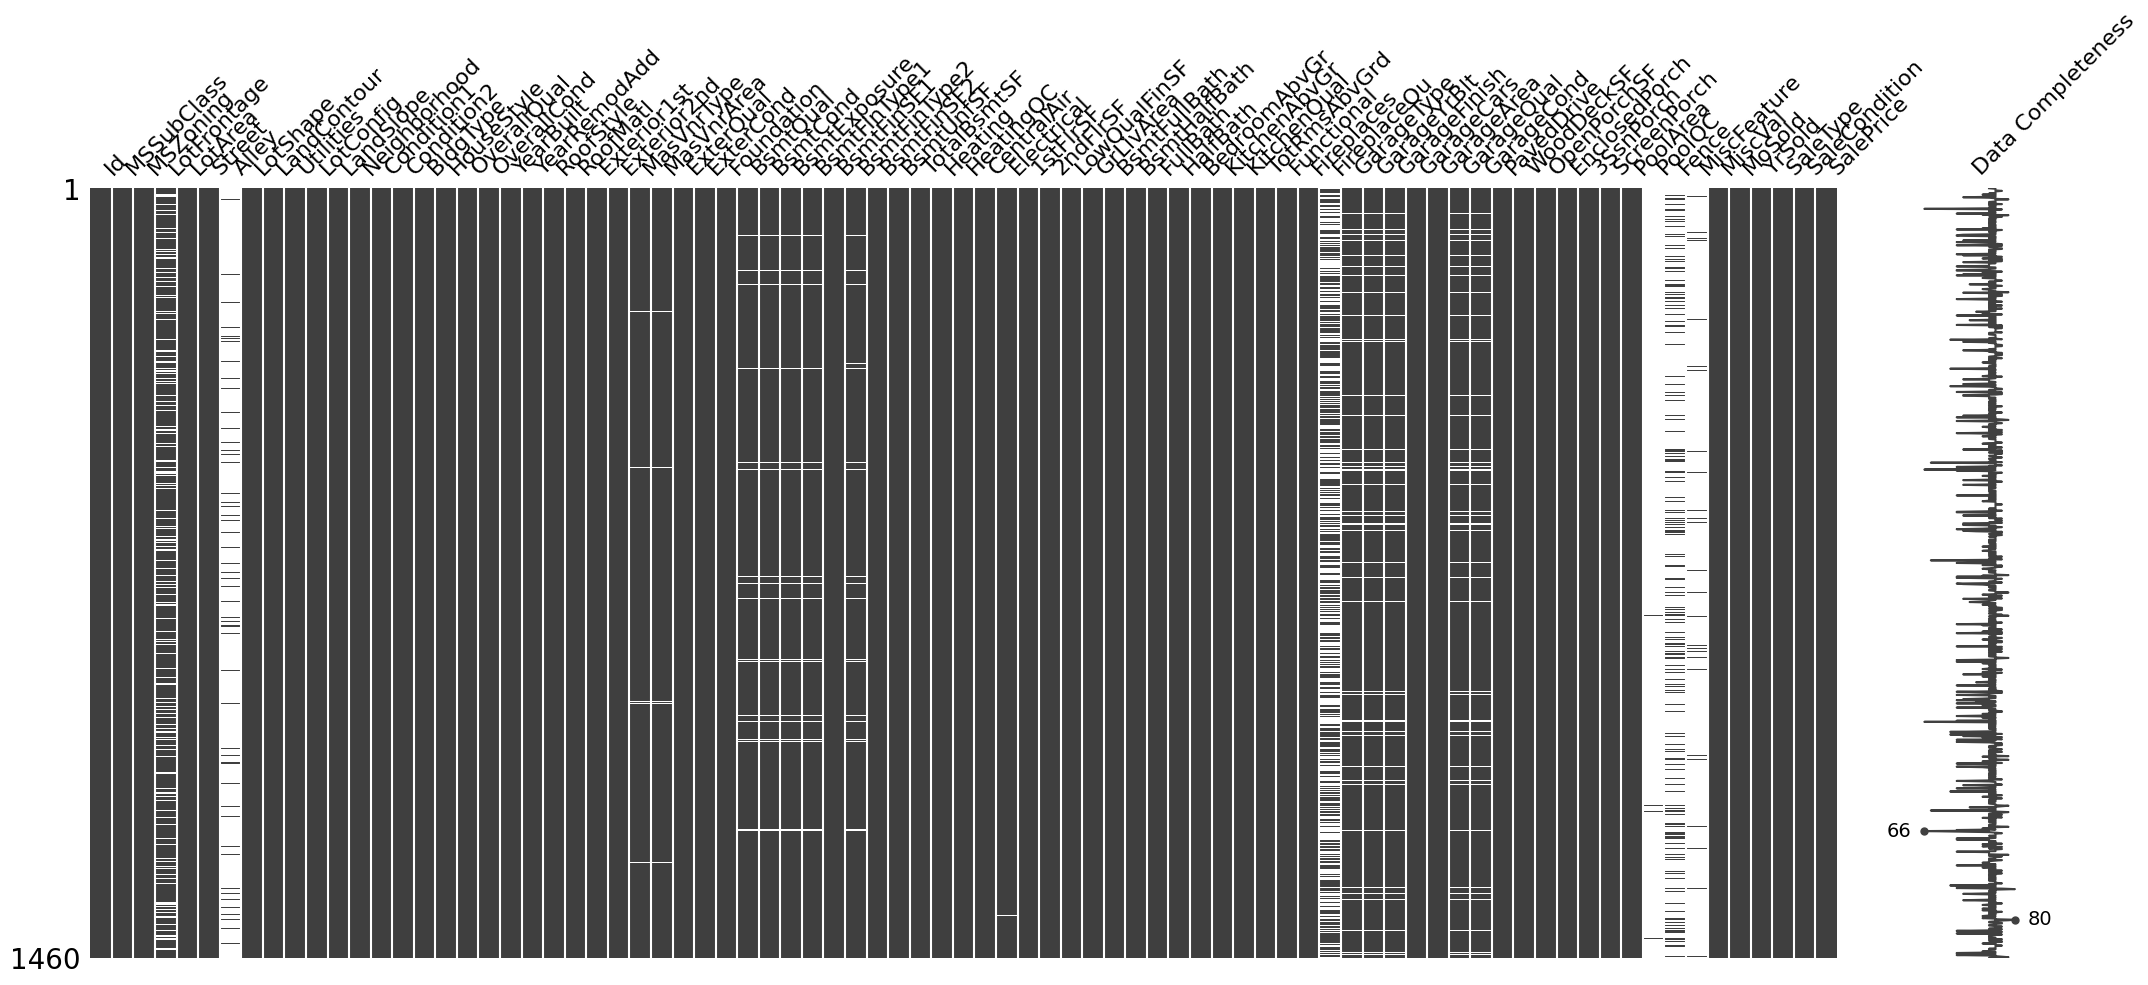

In [6]:
# Matrix plot
msno.matrix(data, labels=data.columns.any())
plt.show()

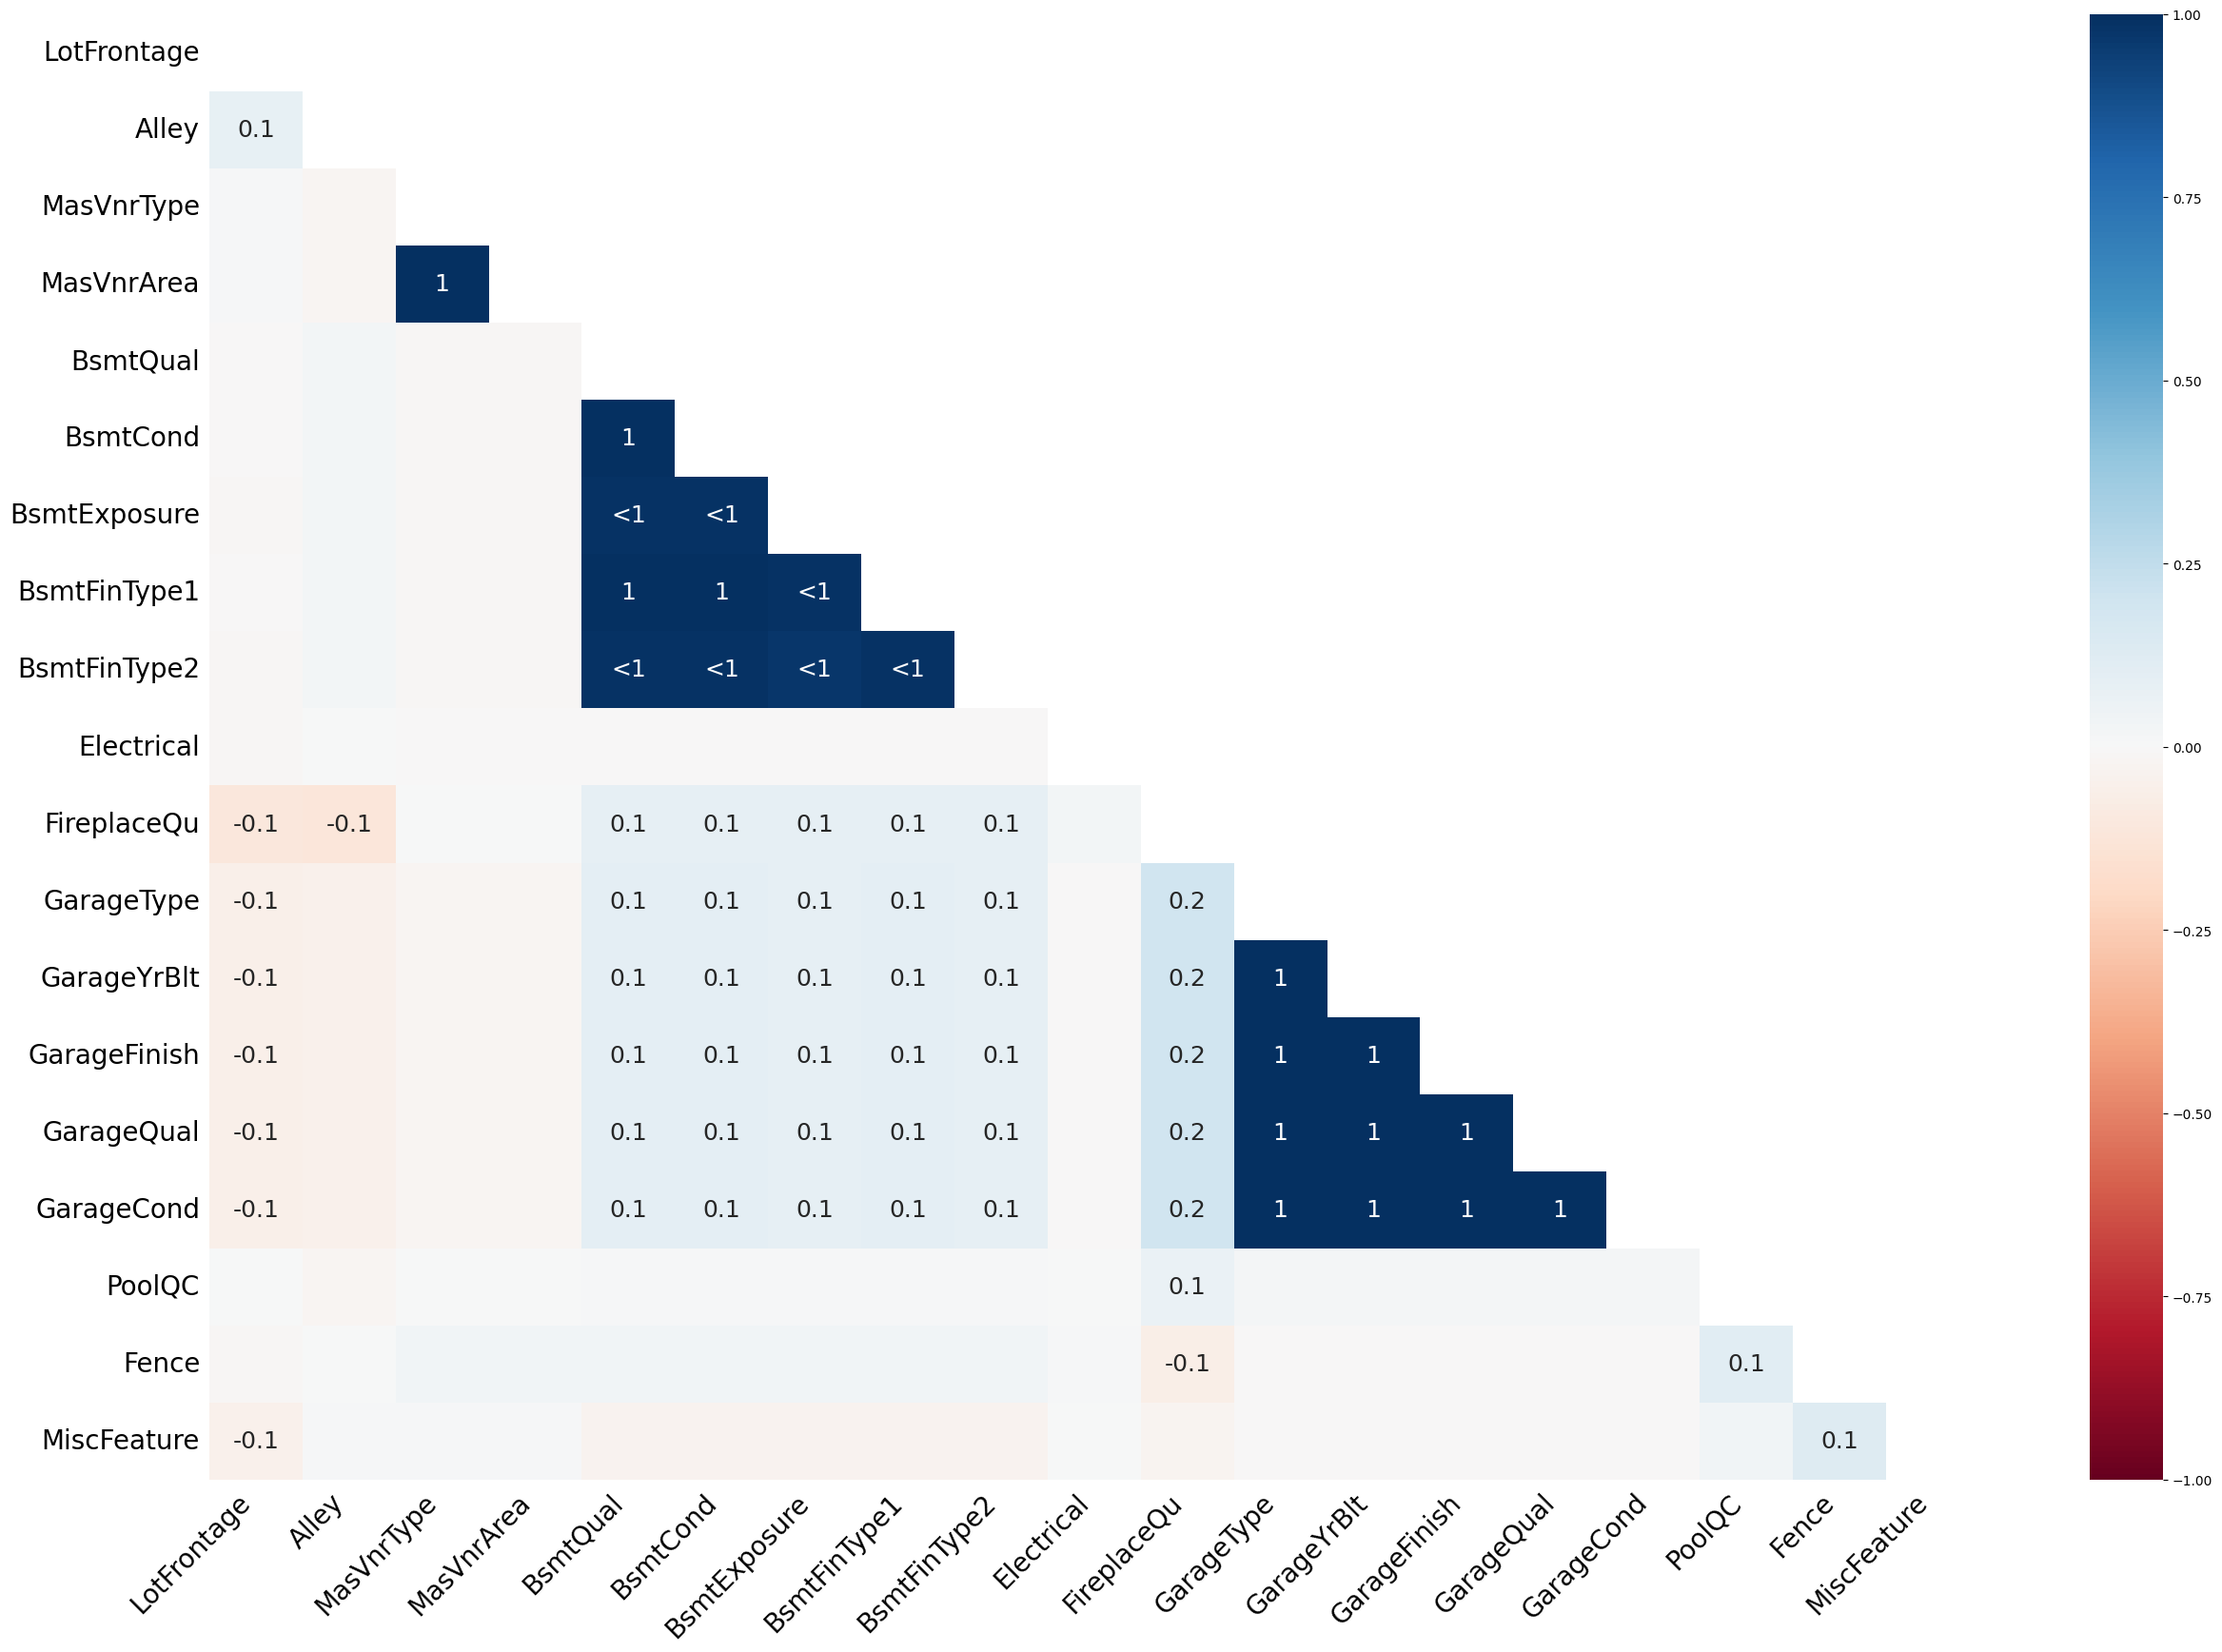

In [7]:
# Heatmap for correlation of null data between variables
msno.heatmap(data,figsize=(30,20), fontsize=20)
plt.show()

In [8]:
corr = data.isnull().corr(method='spearman')
for column in data.columns[data.isna().any()].tolist():
    if (np.abs(corr[column]).dropna()>0.4).sum()-1 == 0:
        print(column, "column is MCAR")
    else:
        print(column, "column is MAR")

LotFrontage column is MCAR
Alley column is MCAR
MasVnrType column is MAR
MasVnrArea column is MAR
BsmtQual column is MAR
BsmtCond column is MAR
BsmtExposure column is MAR
BsmtFinType1 column is MAR
BsmtFinType2 column is MAR
Electrical column is MCAR
FireplaceQu column is MCAR
GarageType column is MAR
GarageYrBlt column is MAR
GarageFinish column is MAR
GarageQual column is MAR
GarageCond column is MAR
PoolQC column is MCAR
Fence column is MCAR
MiscFeature column is MCAR


In [9]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == float:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

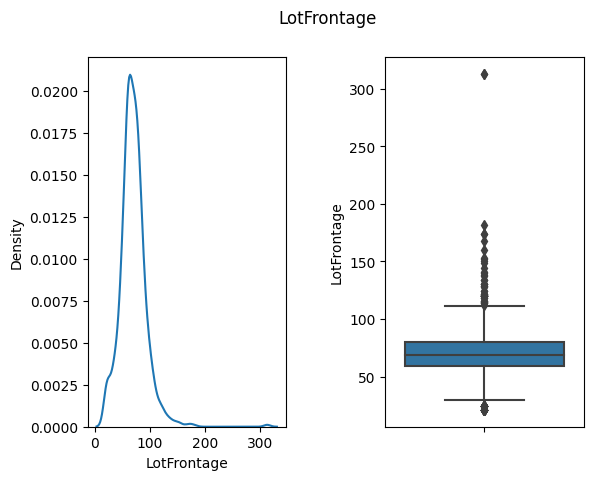

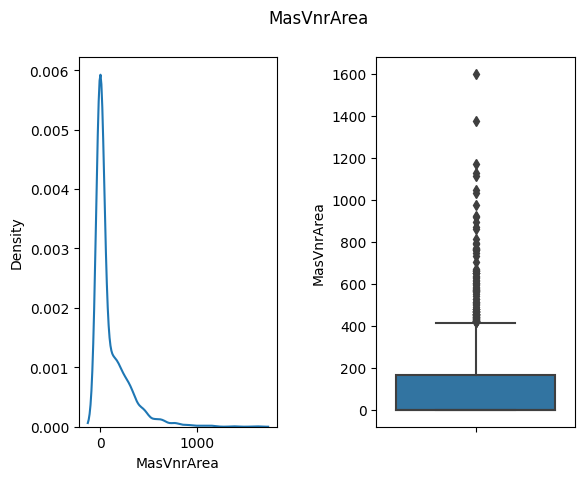

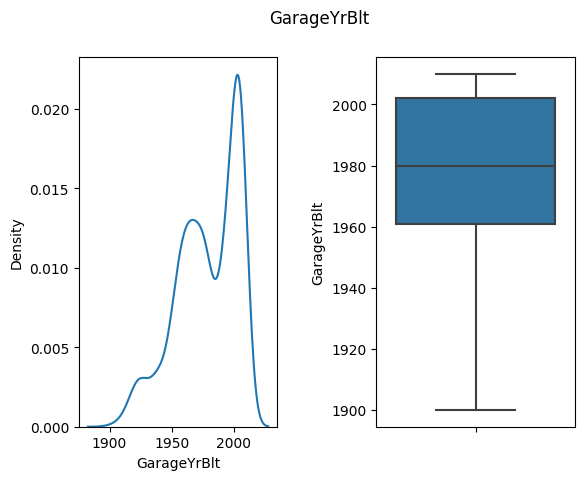

In [10]:
for column in numerical_columns:
    f, ax = plt.subplots(1,2)
    sns.kdeplot(data=data, x=column,ax=ax[0])
    sns.boxplot(data=data, y=column,ax=ax[1])
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(column)
    plt.show()

## Mean Imputation

Missing values are handled by replacing missing values with mean of a given variable.

Assumption: <b>Data missing is completely at random (not dependent on other features)</b>

Advantages: Easy to implement

Disadvantages: Distorts variance and correlation of original data

Variable types: Continuous quantitative variables that are fairly symmetrical (skewness between -0.5 and 0.5)

Skewness of variable before mean imputation: 2.163569142324884
Variance of variable before mean imputation: 589.7491687482653


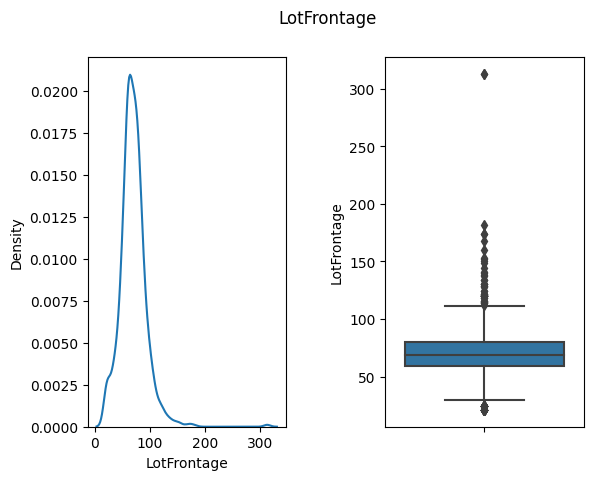

In [11]:
# Checking skewness and variance of variable
print(f"Skewness of variable before mean imputation: {data['LotFrontage'].skew()}")
print(f"Variance of variable before mean imputation: {data['LotFrontage'].var()}")
# Before mean imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='LotFrontage',ax=ax[0])
sns.boxplot(data=data, y='LotFrontage',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('LotFrontage')
plt.show()

In [12]:
# Filling missing values with mean of variable
imputer = fei.MeanMedianImputer('mean', variables = ['LotFrontage'])
transformed_data = imputer.fit_transform(data)

Skewness of variable after mean imputation: 2.3849501679427925
Variance of variable after mean imputation: 485.05757539267887


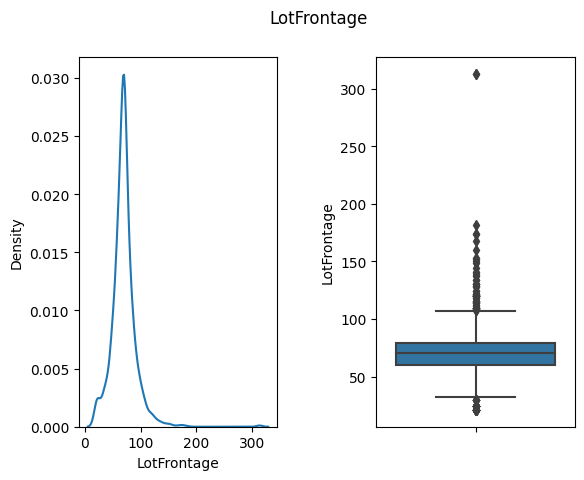

In [13]:
# Checking skewness and variance of variable
print(f"Skewness of variable after mean imputation: {transformed_data['LotFrontage'].skew()}")
print(f"Variance of variable after mean imputation: {transformed_data['LotFrontage'].var()}")
# After mean imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=transformed_data, x='LotFrontage',ax=ax[0])
sns.boxplot(data=transformed_data, y='LotFrontage',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('LotFrontage')
plt.show()

## Median Imputation

Missing values are handled by replacing missing values with median of a given variable.

Assumption: <b>Data missing is completely at random (not dependent on other features)</b>

Advantages: Easy to implement

Disadvantages: Distorts variance and correlation of original data (smaller impact compared to mean imputation method)

Variable types:
- Discrete quantitative variables
- Continuous quantitative variables with moderate to large skewness (less than -0.5 or more than 0.5)

Skewness of variable before median imputation: 2.163569142324884
Variance of variable before median imputation: 589.7491687482653


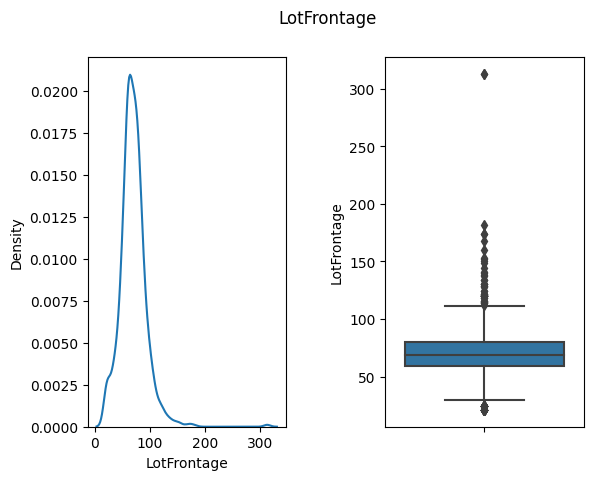

In [14]:
# Checking skewness and variance of variable
print(f"Skewness of variable before median imputation: {data['LotFrontage'].skew()}")
print(f"Variance of variable before median imputation: {data['LotFrontage'].var()}")
# Before median imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='LotFrontage',ax=ax[0])
sns.boxplot(data=data, y='LotFrontage',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('LotFrontage')
plt.show()

In [15]:
# Filling missing values with median of variable
imputer = fei.MeanMedianImputer('median', variables=['LotFrontage'])
transformed_data = imputer.fit_transform(data)

Skewness of variable after median imputation: 2.4091466665496006
Variance of variable after median imputation: 485.21855793515925


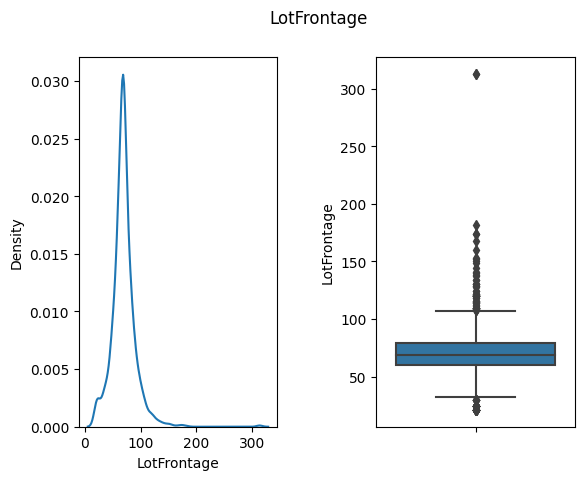

In [16]:
# Checking skewness and variance of variable
print(f"Skewness of variable after median imputation: {transformed_data['LotFrontage'].skew()}")
print(f"Variance of variable after median imputation: {transformed_data['LotFrontage'].var()}")
# After median imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=transformed_data, x='LotFrontage',ax=ax[0])
sns.boxplot(data=transformed_data, y='LotFrontage',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('LotFrontage')
plt.show()

## Random Sample Imputation

Missing values are handled by replacing missing values from a random sample.

Assumption: <b>Data missing is completely at random (not dependent on other features)</b>

Advantages: 
- Easy to implement
- Preserves original distribution of data
- Less distortion of variance

Disadvantages: Depends on condition that randomness works in a given problem.

Variable types:
- Quantitative variables
- Categorical variables

Skewness of variable before random sample imputation: 2.669084210182863
Variance of variable before random sample imputation: 32784.9711678846


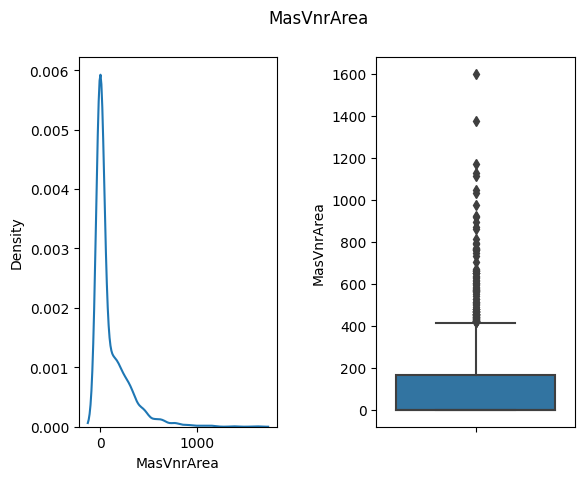

In [17]:
# Checking skewness and variance of variable
print(f"Skewness of variable before random sample imputation: {data['MasVnrArea'].skew()}")
print(f"Variance of variable before random sample imputation: {data['MasVnrArea'].var()}")
# Before random sample imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='MasVnrArea',ax=ax[0])
sns.boxplot(data=data, y='MasVnrArea',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('MasVnrArea')
plt.show()

In [18]:
# Using random sample imputer
rsi = fei.RandomSampleImputer(variables=['MasVnrArea'])
transformed_data = rsi.fit_transform(data)

Skewness of variable after random sample imputation: 2.673971296911132
Variance of variable after random sample imputation: 32674.029464730014


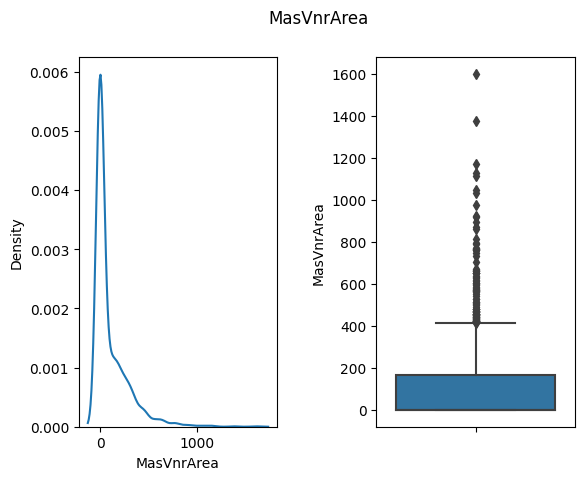

In [19]:
# Checking skewness and variance of variable
print(f"Skewness of variable after random sample imputation: {transformed_data['MasVnrArea'].skew()}")
print(f"Variance of variable after random sample imputation: {transformed_data['MasVnrArea'].var()}")
# After random sample imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=transformed_data, x='MasVnrArea',ax=ax[0])
sns.boxplot(data=transformed_data, y='MasVnrArea',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('MasVnrArea')
plt.show()

## Missing Data Indicator

Missing values are handled by adding additional feature to indicate if data is missing or not

Assumption: <b>Data missing is not at random.</b>

Advantages: 
- Easy to implement
- Captures importance of missing data

Disadvantages: Creates additional features, which may cause curse of dimensionality for datasets with many variables having missing values.

Variable types:
- Quantitative variables
- Categorical variables

<b>Note that missing data indicator can be used together with other imputation methods that do not capture importance of missing data.</b>

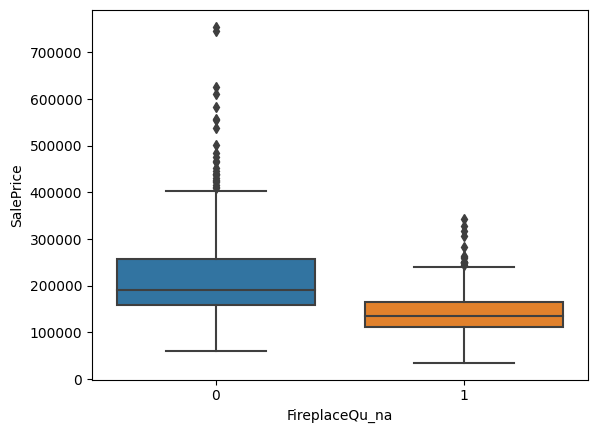

In [20]:
transformer = fei.AddMissingIndicator(variables=['FireplaceQu'])
transformed_data = transformer.fit_transform(data)
sns.boxplot(data = transformed_data, y= 'SalePrice', x='FireplaceQu_na')
plt.show()

## End Tail Imputer

Missing values are handled by replacing missing values by extreme end of variable distribution (either based on mean + standard deviation or interquartile range)

Assumption: <b>Data missing is not at random.</b>

Advantages:
- Easy to implement
- Captures importance of missing data

Disadvantages:
- Distorts original distribution of variable
- Masking predictive power of original variable
- Mask true outliers for large null values
- Replaced null values may be outliers for small null values

Variable types: Continuous quantitative variables

Skewness of variable before end tail imputation: 2.669084210182863
Variance of variable before end tail imputation: 32784.9711678846


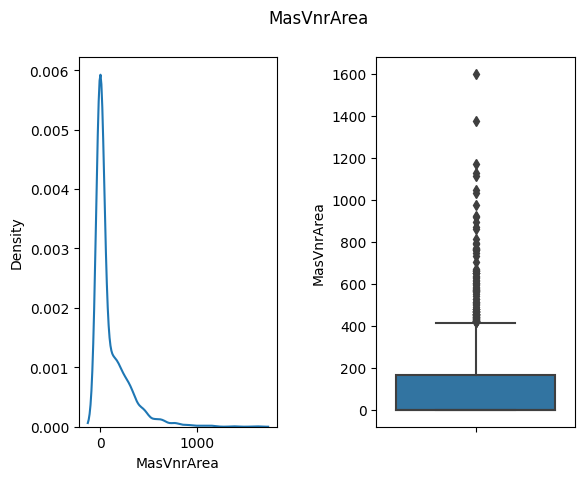

In [21]:
# Checking skewness and variance of variable
print(f"Skewness of variable before end tail imputation: {data['MasVnrArea'].skew()}")
print(f"Variance of variable before end tail imputation: {data['MasVnrArea'].var()}")
# Before end tail imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='MasVnrArea',ax=ax[0])
sns.boxplot(data=data, y='MasVnrArea',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('MasVnrArea')
plt.show()

In [22]:
eti = fei.EndTailImputer(imputation_method='iqr', fold=3, variables=['MasVnrArea'])
transformed_data = eti.fit_transform(data)

Note that iqr method is used for non-gaussian distribution, while gaussian method is used for gaussian distribution

Skewness of variable after end tail imputation: 2.580789577902082
Variance of variable after end tail imputation: 34317.239003539675


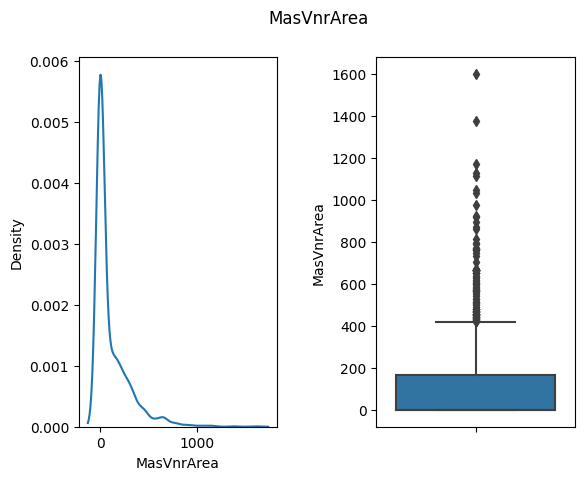

In [23]:
# Checking skewness and variance of variable
print(f"Skewness of variable after end tail imputation: {transformed_data['MasVnrArea'].skew()}")
print(f"Variance of variable after end tail imputation: {transformed_data['MasVnrArea'].var()}")
# After end tail imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=transformed_data, x='MasVnrArea',ax=ax[0])
sns.boxplot(data=transformed_data, y='MasVnrArea',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('MasVnrArea')
plt.show()

## Arbitrary Value Imputation

Missing data is handled by replacing missing data with an arbitrary value that is different from mean, mode, median and not in the range of normal values.

Assumption: <b>Data missing is not at random.</b>

Advantages:
- Easy to implement
- Captures importance of missing data

Disadvantages:
- Distorts original distribution of variable
- Masking predictive power of original variable
- Difficult to decide value to use
- Create outliers if the arbitrary value is at the end of the distribution

Variable types: Quantitative variables


Skewness of variable before arbitrary value imputation: 2.669084210182863
Variance of variable before arbitrary value imputation: 32784.9711678846


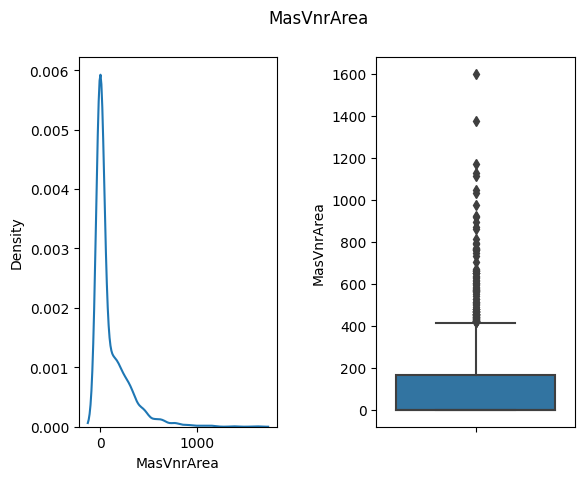

In [24]:
# Checking skewness and variance of variable
print(f"Skewness of variable before arbitrary value imputation: {data['MasVnrArea'].skew()}")
print(f"Variance of variable before arbitrary value imputation: {data['MasVnrArea'].var()}")
# Before arbitrary value imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='MasVnrArea',ax=ax[0])
sns.boxplot(data=data, y='MasVnrArea',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('MasVnrArea')
plt.show()

In [25]:
ani = fei.ArbitraryNumberImputer(20, variables=['MasVnrArea'])
transformed_data = ani.fit_transform(data)

Skewness of variable after arbitrary value imputation: 2.6787952251007034
Variance of variable after arbitrary value imputation: 32643.394076915134


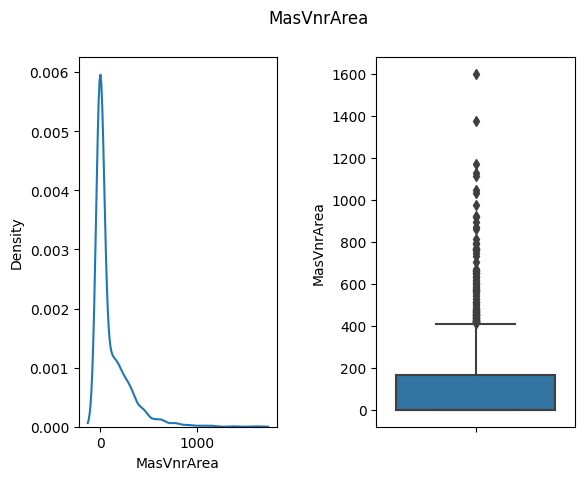

In [26]:
# Checking skewness and variance of variable
print(f"Skewness of variable after arbitrary value imputation: {transformed_data['MasVnrArea'].skew()}")
print(f"Variance of variable after arbitrary value imputation: {transformed_data['MasVnrArea'].var()}")
# After arbitrary value imputation
f, ax = plt.subplots(1,2)
sns.kdeplot(data=transformed_data, x='MasVnrArea',ax=ax[0])
sns.boxplot(data=transformed_data, y='MasVnrArea',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('MasVnrArea')
plt.show()

## Frequent Category Imputation

Missing data is handled by replacing missing values by most frequent category.

Assumption: 
- <b>Data missing is at random.</b>
- High probability that missing data looks like the majority of the data.

Advantages: Easy to implement

Disadvantages:
- Most frequent labels may be over represented for large number of null values
- Distorts relation of the most frequent labels

Variable types: Categorical variables with small proportion of null values (Not more than 5 to 6%)

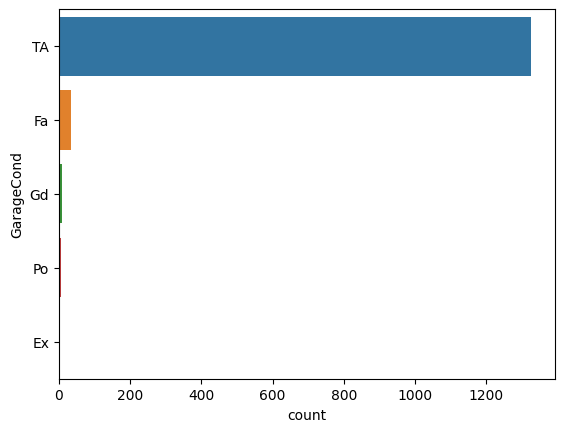

In [27]:
# Before frequent category imputation
sns.countplot(data=data, y='GarageCond')
plt.show()

In [28]:
catimputer = fei.CategoricalImputer(imputation_method='frequent',variables=['GarageCond'])
transformed_data = catimputer.fit_transform(data)

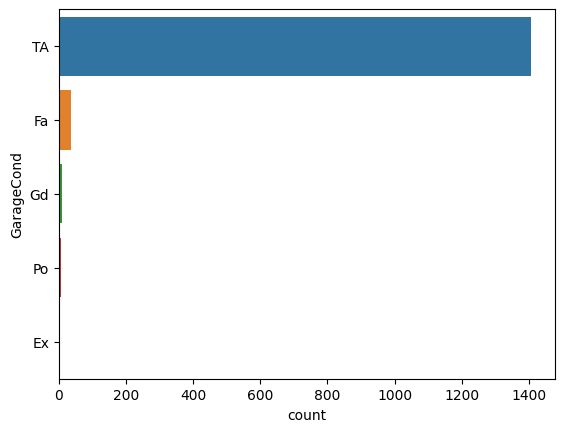

In [29]:
# After frequent category imputation
sns.countplot(data=transformed_data, y='GarageCond')
plt.show()

## Missing Category Imputation

Missing data is handled by replacing missing values by a new category.

Assumption: No assumptions

Advantages: 
- Easy to implement
- Does not distort relation of most frequent label

Disadvantages:
- Not suitable for missing values with high frequency

Variable types: Categorical variables with small proportion of null values

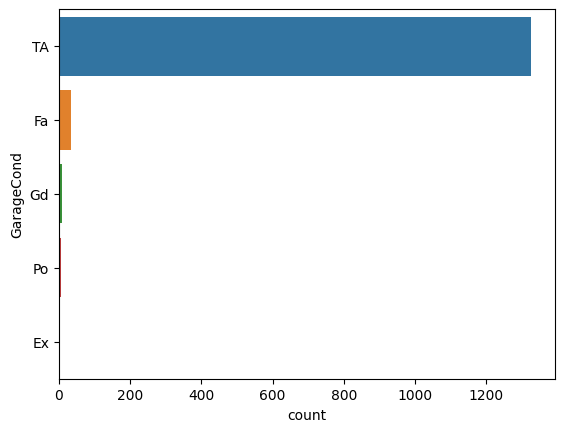

In [30]:
# Before missing category imputation
sns.countplot(data=data, y='GarageCond')
plt.show()

In [31]:
catimputer = fei.CategoricalImputer(imputation_method='missing', fill_value='Missing',variables=['GarageCond'])
transformed_data = catimputer.fit_transform(data)

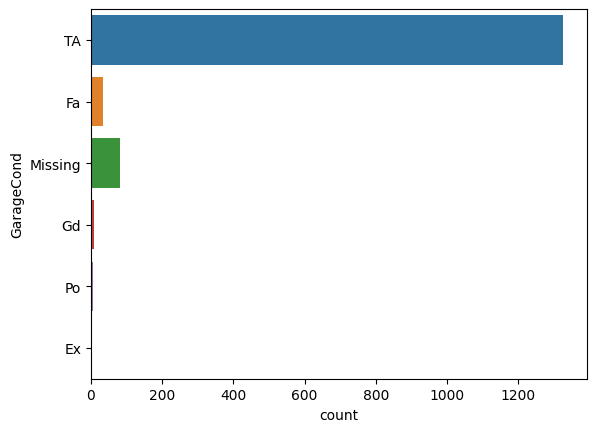

In [32]:
# After missing category imputation
sns.countplot(data=transformed_data, y='GarageCond')
plt.show()

## Iterative Imputation

Missing data is handled by iteratively modelling each feature with missing values (target) as a function of other features to make predictions as replacement of missing data by utilizing regression model.

Assumptions: No assumptions

Advantages:
- Suitable for variables with many missing values
- Usually provides better performance than mean/median/mode imputation

Disadvantages:
- Computationally expensive
- Can be slow for large datasets
- Further hyperparameter tuning required

Variable types: 
- Continuous quantitative variables
- Categorical variables after encoding

Note that iterative imputer in sklearn is derived from "Multiple Imputation by Chained Equations (MICE) method"

In [33]:
# Dict of hyperparameters for iterative imputer
IterativeImputer().get_params()

{'add_indicator': False,
 'estimator': None,
 'imputation_order': 'ascending',
 'initial_strategy': 'mean',
 'max_iter': 10,
 'max_value': inf,
 'min_value': -inf,
 'missing_values': nan,
 'n_nearest_features': None,
 'random_state': None,
 'sample_posterior': False,
 'skip_complete': False,
 'tol': 0.001,
 'verbose': 0}

Note that the following hyperparameters can be adjusted for iterative imputer:
1. estimator: default estimator used is BayesianRidge()
2. initial_strategy: strategy to initialize missing values (mean, median, most_frequent, constant)
3. imputation_order: order of imputing features (ascending, descending, roman, arabic, random)
3. max_iter: increase this value if convergence not reached
4. skip_complete: set to True if there are lots of features with no missing values
5. sample_posterior: set to True for multiple imputation

In [34]:
imputer = IterativeImputer(max_iter = 100, verbose=1)
transformed_data = pd.DataFrame(imputer.fit_transform(data[numerical_columns]), columns = numerical_columns)

[IterativeImputer] Completing matrix with shape (1460, 3)
[IterativeImputer] Change: 98.45468622086534, scaled tolerance: 2.0100000000000002 
[IterativeImputer] Change: 8.362323976013158, scaled tolerance: 2.0100000000000002 
[IterativeImputer] Change: 0.09775619881789055, scaled tolerance: 2.0100000000000002 
[IterativeImputer] Early stopping criterion reached.


In [35]:
transformed_data.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,70.073228,103.937659,1978.324752
std,22.085375,180.621490,24.009728
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1962.000000
50%,68.213672,0.000000,1978.000000
75%,79.069972,166.000000,2001.000000
max,313.000000,1600.000000,2010.000000


## KNN Imputation

Missing data is handled by replacing every missing value by the mean of the n_neighbors non-null samples found in proximity to a given sample using K nearest neighbors (KNN) algorithm.

Assumptions: No assumptions

Advantages: Usually provides better performance than mean/median/mode imputation

Disadvantages:
- Computationally expensive
- Sensitive to outliers
- Further hyperparameter tuning required

Variable types: 
- Continuous quantitative variables
- Categorical variables after encoding

In [36]:
# Dict of hyperparameters for KNN imputer
KNNImputer().get_params()

{'add_indicator': False,
 'copy': True,
 'metric': 'nan_euclidean',
 'missing_values': nan,
 'n_neighbors': 5,
 'weights': 'uniform'}

Note that the following hyperparameters can be adjusted for KNN imputer:
1. n_neighbors: number of neighbors to consider for imputing missing values. (Small value will increase influence of noise, while large values will significantly reduce noise influence. Odd values are recommended for binary classes to avoid ties)
2. weights: weight function used for prediction (uniform, distance)

In [37]:
imputer = KNNImputer(n_neighbors=3)
transformed_data = pd.DataFrame(imputer.fit_transform(data[numerical_columns]), columns = numerical_columns)

In [38]:
transformed_data.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,69.013699,103.761187,1978.010502
std,22.772919,180.727178,24.190812
min,21.000000,0.000000,1900.000000
25%,56.666667,0.000000,1962.000000
50%,67.000000,0.000000,1978.000000
75%,80.000000,166.000000,2001.000000
max,313.000000,1600.000000,2010.000000


## Missing Forest Imputation

Missing data is handled by first replacing every missing value using mean/median imputation, followed by marking records with missing values as prediction for random forest model iteratively.

Assumptions: No assumptions

Advantages: 
- Usually provides better performance than mean/median/mode imputation
- Robust to outliers and multicollinearity
- Not prone to curse of dimensionality

Disadvantages:
- Computationally expensive
- Not suitable for small datasets
- Algorithm that needs to be run every time new missing data is imputed

Variable types: 
- Continuous quantitative variables
- Categorical variables after encoding

In [39]:
# Dict of hyperparameters for MissForest imputer
MissForest().get_params()

{'bootstrap': True,
 'class_weight': None,
 'copy': True,
 'criterion': ('mse', 'gini'),
 'decreasing': False,
 'max_depth': None,
 'max_features': 'auto',
 'max_iter': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'missing_values': nan,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
imputer = MissForest(verbose=1,criterion=('squared_error','gini'))
transformed_data = pd.DataFrame(imputer.fit_transform(data[numerical_columns]), columns = numerical_columns)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

Iteration: 0


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.

Iteration: 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

Iteration: 2


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Iteration: 3


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
transformed_data.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,70.144758,103.934217,1978.015968
std,22.706020,180.802312,24.294157
min,21.000000,0.000000,1900.000000
25%,60.000000,0.000000,1961.000000
50%,70.000000,0.000000,1978.420000
75%,80.000000,166.000000,2001.000000
max,313.000000,1600.000000,2010.000000


## Complete Case Analysis (List-wise deletion)

Missing data is handled by simply removing records with any missing values.

Assumptions: <b>Data missing is at random</b>

Advantages:
- Easy to implement.
- No Data manipulation required.

Disadvantages:
- Deleted data can be informative.
- Can lead to the deletion of a large part of the data.
- Can create a bias in the dataset, if a large amount of a particular type of variable is deleted from it.

Variable types: All variable types with small proportion of null values (Not more than 5 to 6%)

## Dropping Columns

Missing data is handled by removing columns with large number of null values

Assumptions: No assumptions

Advantages:
- Easy to implement
- May improve model performance for features that are identified to be insignifcant

Disadvantages:
- Deleted data can be informative
- May worsen model performance for features that are identified to be significant

Variable types: All variable types with very large proportion of null values (at least 80%)

<b>Note that this approach is generally not recommended, unless if the feature is insignificant in the first place.</b>